# Setup

In [59]:
#import os
#import numpy as np
#import networkx as nx
import pandas as pd
#from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
#from sklearn import preprocessing
import matplotlib.pylab as plt

# Import Data

In [60]:
#Table 3.2: First Nine Records in the Demo Data
CHRoster_df = pd.read_csv('CommunityHealthRoster_Demo.csv')
CHRoster_df.head()

,Unnamed: 0,ProviderName,Age,Sex,Social_Risk_Factor,Num_Social_Risk_Factors,Inpatient_Psych_Service,Num_IP_Facility_Days,Total_Cost_IP_Facility_Days,Avg_Cost_IP_Facility_Days,Emergency_Dept_Service,Num_Emergency_Dept_Services,Avg_Cost_Emergency_Dept_Services,Alcohol_or_Drug_Diagnosis,Major_Depressive_Disorder_Diagnosis,Race_Black_Indigenous_PeopleOfColor,Married,Employed
0,1,Chewbacca,52,F,0,0,0,NaN,NaN,NaN,0,NaN,NaN,0,0,0.0,NaN,0
1,2,AhsokaTano,65,M,0,0,0,NaN,NaN,NaN,1,10.0,197.900,1,1,0.0,1.0,0
2,3,Omega,55,F,0,0,0,NaN,NaN,NaN,0,NaN,NaN,0,0,0.0,NaN,0
3,4,Chewbacca,46,F,1,1,0,NaN,NaN,NaN,0,NaN,NaN,1,0,0.0,NaN,0
4,5,AhsokaTano,58,F,0,0,0,NaN,NaN,NaN,1,4.0,152.595,0,0,0.0,NaN,0


# rename CAT. MEDV column for easier data handling

In [61]:
CHRoster_df.dtypes

Unnamed: 0                               int64
ProviderName                            object
Age                                      int64
Sex                                     object
Social_Risk_Factor                       int64
Num_Social_Risk_Factors                  int64
Inpatient_Psych_Service                  int64
Num_IP_Facility_Days                   float64
Total_Cost_IP_Facility_Days            float64
Avg_Cost_IP_Facility_Days              float64
Emergency_Dept_Service                   int64
Num_Emergency_Dept_Services            float64
Avg_Cost_Emergency_Dept_Services       float64
Alcohol_or_Drug_Diagnosis                int64
Major_Depressive_Disorder_Diagnosis      int64
Race_Black_Indigenous_PeopleOfColor    float64
Married                                float64
Employed                                 int64
dtype: object

# Plots

## Viridis Color Pallette
Viridis
"#440154", "#482878", "#3E4989", "#31688E", "#26828E", "#1F9E89", "#35B779", "#6DCD59", "#B4DE2C", "#FDE725"

## scatter plot with axes names

<Axes: xlabel='Num_IP_Facility_Days', ylabel='Total_Cost_IP_Facility_Days'>

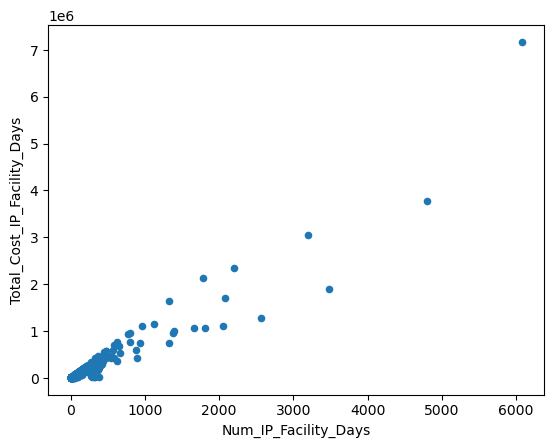

In [62]:
CHRoster_df.plot.scatter(x='Num_IP_Facility_Days', 
                         y='Total_Cost_IP_Facility_Days', 
                         legend=False)

In [63]:
CHRoster_df['Sex'].unique() #check unique value of CHAS column

array(['F', 'M'], dtype=object)

In [46]:
# CHRoster_df.mean() # calculate mean for all columns
# Doesn't work on this data set because of non-numeric variables.

In [15]:
# Doesn't work because of non-numeric variables
# CHRoster_df.groupby('Sex').mean() # compute mean per CHAS = (0, 1)

In [64]:
CHRoster_df.groupby('Sex')['Num_IP_Facility_Days'].mean() #compute mean 'Num_IP_Facility_Days' per Sex = (0, 1)

Sex
F     76.656075
M    110.886364
Name: Num_IP_Facility_Days, dtype: float64

## Barchart Num_IP_Facility_Days by Sex

<Axes: xlabel='Sex'>

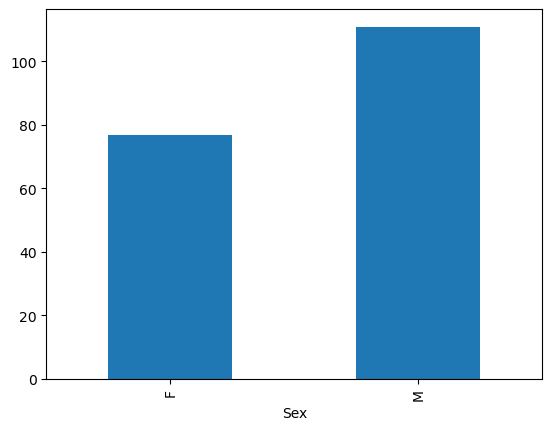

In [65]:
# compute mean Num_IP_Facility_Days by Sex = (0, 1)
CHRoster_df.groupby('Sex')['Num_IP_Facility_Days'].mean().plot(kind='bar')

Text(0, 0.5, 'Avg. Num IP Days')

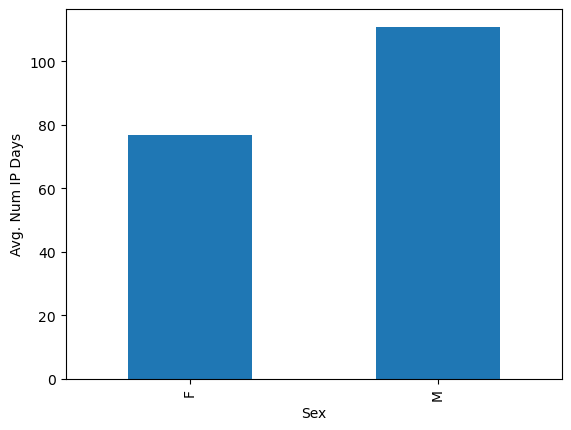

In [66]:
# compute mean MEDV per CHAS = (0, 1)
ax = CHRoster_df.groupby('Sex')['Num_IP_Facility_Days'].mean().plot(kind='bar')
# add ylabel
ax.set_ylabel('Avg. Num IP Days')
# Must be run together

## barchart of CHAS vs. CAT_MEDV %,

# Barchart of Sex vs Major Depressive %

In [68]:
# CHRoster_df.groupby('Sex').mean()

Text(0, 0.5, 'CAT_MEDV %')

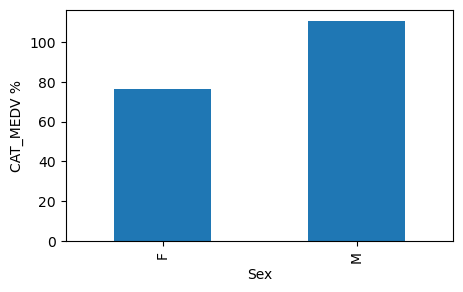

In [72]:
# run the following three lines together
dataForPlot = CHRoster_df.groupby('Sex')['Num_IP_Facility_Days'].mean()
ax = dataForPlot.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('CAT_MEDV %')

# matplotlib version

## more info on matplotlib https://matplotlib.org/stable/index.html

### Set the color of the points in the scatterplot and draw as open circles.

Text(0, 0.5, 'MEDV')

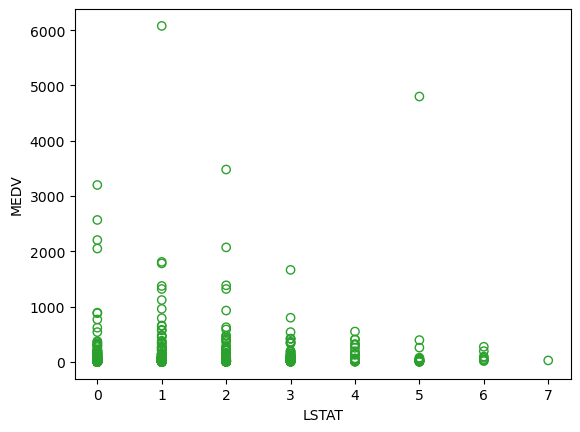

In [78]:
# run the following three lines together to get the correct diagram
plt.scatter(CHRoster_df['Num_Social_Risk_Factors'], CHRoster_df['Num_IP_Facility_Days'], color='C2', facecolor='none')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

## barchart of CHAS vs. mean MEDV

In [81]:
# compute mean MEDV per CHAS = (0, 1)
dataForPlot = CHRoster_df.groupby('Major_Depressive_Disorder_Diagnosis')['Avg_Cost_Emergency_Dept_Services'].mean()

Text(0, 0.5, 'Avg. MEDV')

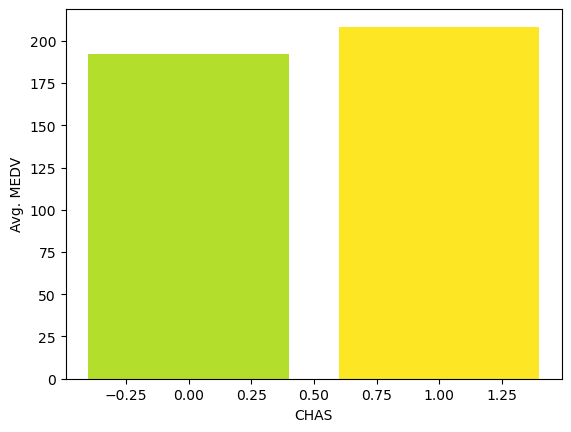

In [82]:
# run the following four lines together
fig, ax = plt.subplots() # return a figure and plots object;  first create a figure and then get a list of axes of a figure
ax.bar(dataForPlot.index, dataForPlot, color=["#B4DE2C", "#FDE725"])
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')

## histogram of MEDV

Text(0, 0.5, 'count')

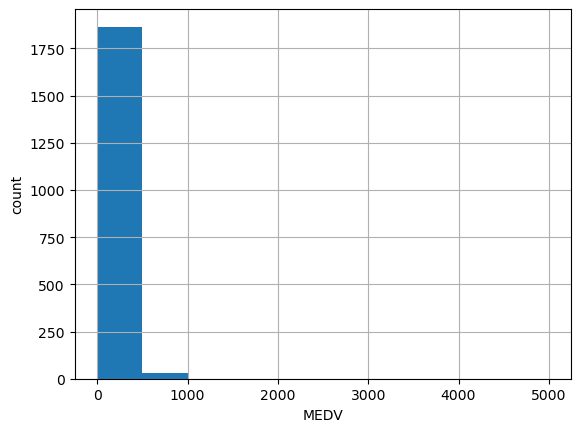

In [85]:
# run the following three lines together
ax = CHRoster_df['Avg_Cost_Emergency_Dept_Services'].hist()
ax.set_xlabel('MEDV')
ax.set_ylabel('count')

Text(0.5, 1.0, '')

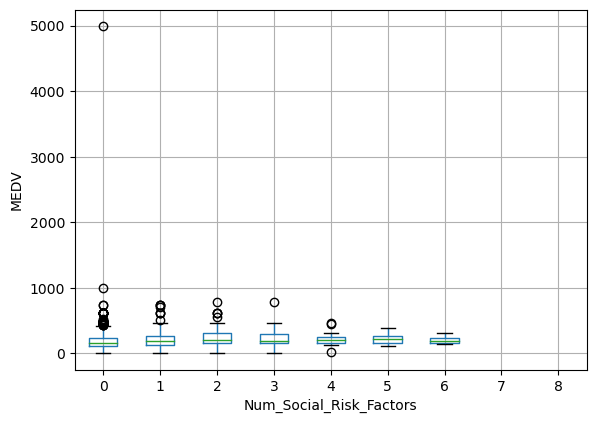

In [87]:
# run the following four lines together
ax = CHRoster_df.boxplot(column='Avg_Cost_Emergency_Dept_Services', by='Num_Social_Risk_Factors')
ax.set_ylabel('MEDV')
plt.suptitle('') # Suppress the titles
plt.title('')

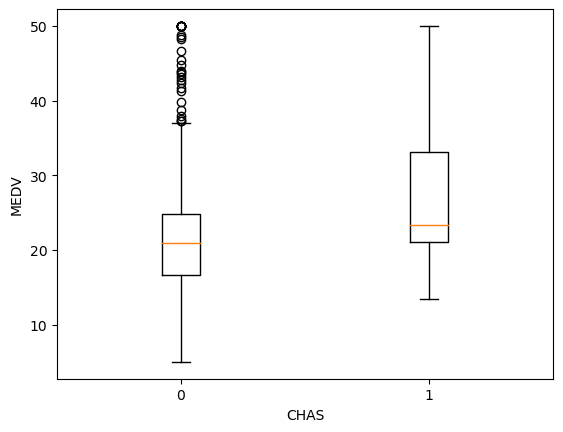

In [26]:
# alternative plot with matplotlib
CHRoster_df[CHRoster_df.CHAS==0].MEDV

# create array/list variable = []
dataForPlot = [list(housing_df[housing_df.CHAS==0].MEDV), list(housing_df[housing_df.CHAS==1].MEDV)] 
#dataForPlot = [housing_df[housing_df.CHAS==0].MEDV, housing_df[housing_df.CHAS==1].MEDV]

# run the following six lines together
fig, ax = plt.subplots()
ax.boxplot(dataForPlot) #  boxplot(x) : x Array or a sequence of vectors
ax.set_xticklabels([0, 1])
ax.set_xlabel('CHAS')
ax.set_ylabel('MEDV')
plt.show()

## side-by-side boxplots

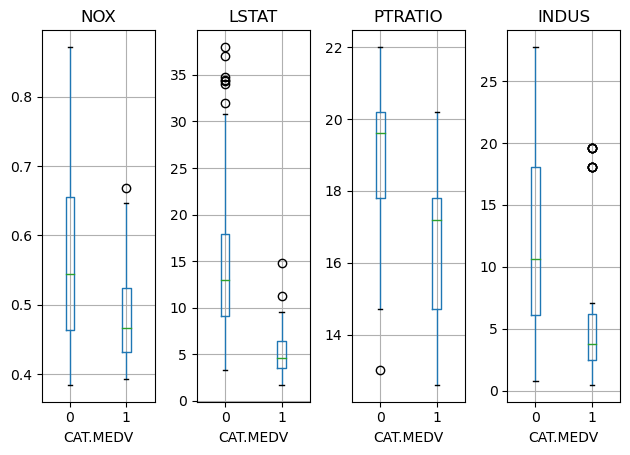

In [27]:
# run the following block together
fig, axes = plt.subplots(nrows=1, ncols=4)
housing_df.boxplot(column='NOX', by='CAT_MEDV', ax=axes[0])
housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=axes[1])
housing_df.boxplot(column='PTRATIO', by='CAT_MEDV', ax=axes[2])
housing_df.boxplot(column='INDUS', by='CAT_MEDV', ax=axes[3])
for ax in axes:
    ax.set_xlabel('CAT.MEDV')
plt.suptitle('') # Suppress the overall title
plt.tight_layout() # Increase the separation between the plots

## simple heatmap of correlations (without values)

### more info on heatmap using seaborn https://indianaiproduction.com/seaborn-heatmap/

<Axes: >

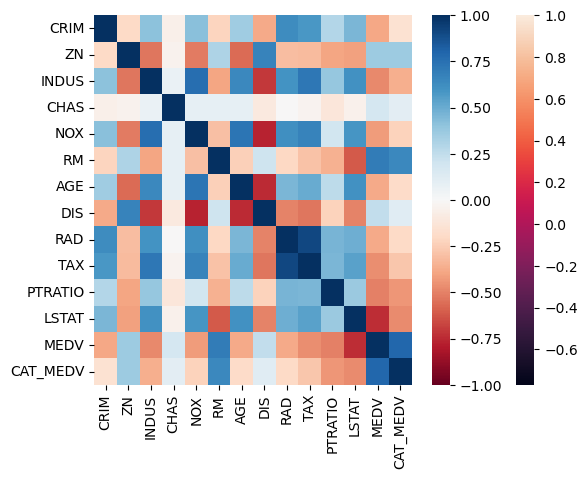

In [29]:
corr = housing_df.corr()
#import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns)

# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            vmin=-1, 
            vmax=1, 
            cmap="RdBu")# vmin & vmax set the limit of the colormap

<Axes: >

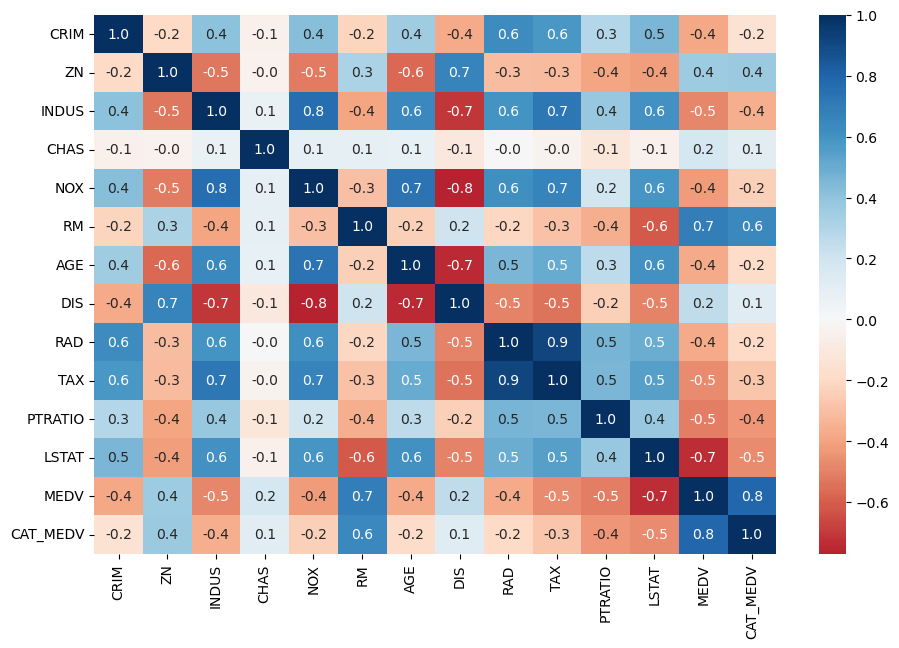

In [30]:
# Include information about values (example demonstrate how to control the size of the plot)
# run the block together
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
## annot add text, fmt add numerical value, one digit after decimal point, center will change the colormap
sns.heatmap(corr, 
            annot=True, 
            fmt=".1f", 
            cmap="RdBu", 
            center=0, 
            ax=ax)